# Graphs
A graph is an abstract representation for a problem used in very different applications. A graph can be used to represent:
* Connections in social media
* Connections between websites
* Distances between geographical areas

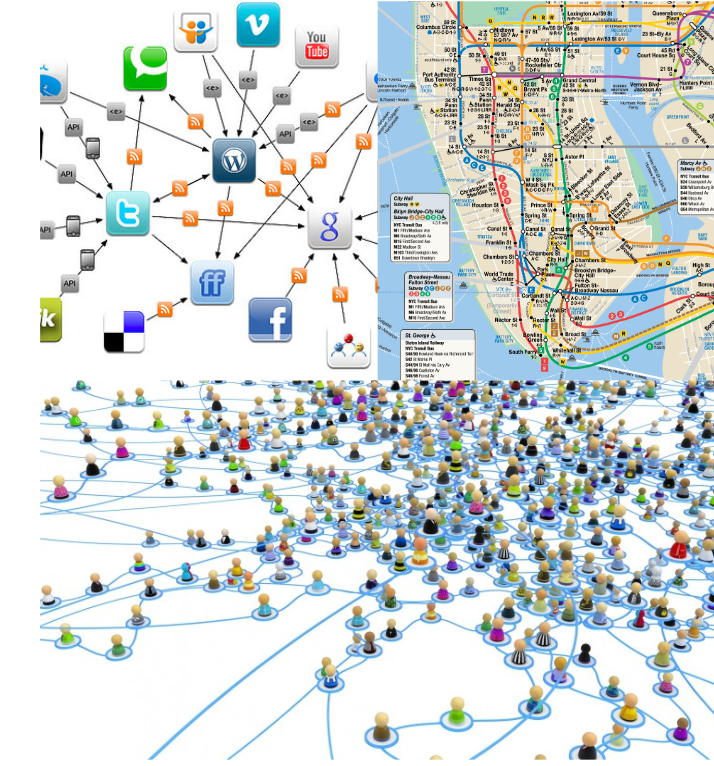

Examples:
 * [Internet mapping project](https://en.wikipedia.org/wiki/Internet_Mapping_Project)
 

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Internet_map_1024.jpg"/>

## Objectives
* Experiment with some practical tools to develop your graph-based projects.
* Implementing algorithms seen in the lectures.


## Introduction
A graph $G=(V,E)$ is an ordered pair made by:
* A set of nodes or vertices $V$
* A set of edges $E$
* Each arc is identified by the pair $(u,v)$, where $u, v \in V$

Definitions:
* A graph $G$ is called **oriented**, **digraph** or **directed** if it consists of oriented arcs (i.e., arcs provided with a direction)
* A graph $G$ is called **undirected** or **not oriented** if its arcs are not oriented
* A graph $G$ is called **weighted** if a weight is associated to each arc (e.g., the distance in km between two cities).


**Bipartite** graph (or **bigraph**):
* Nodes are divided in two sets $N = U \cup V$
* No arcs between nodes belonging to the same set

Example: a neural network is an oriented bigraph!

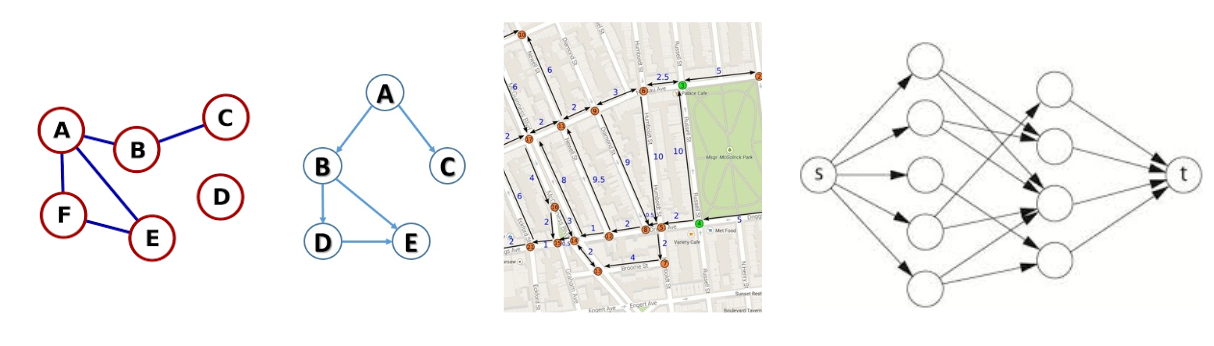

# NetworkX
NetworkX is a popular Python package providing tools for creating and visualizing graphs. Usually it is preinstalled in the Colab environment.

Pyvis is a library used for data visualization, compatible with NetworkX, that can give an interactive visualization within a Python Notebook.

Check out reference documentation [here](https://networkx.org/documentation/stable/reference/index.html).

In [1]:
!pip install networkx

In [2]:
!pip install pyvis

## Create a graph

In [3]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(['A','B','C'])

print(G.nodes())

['A', 'B', 'C']


In [4]:
G.add_edge('A','B')
G.add_edge('B','C')

print(G.edges())

[('A', 'B'), ('B', 'C')]


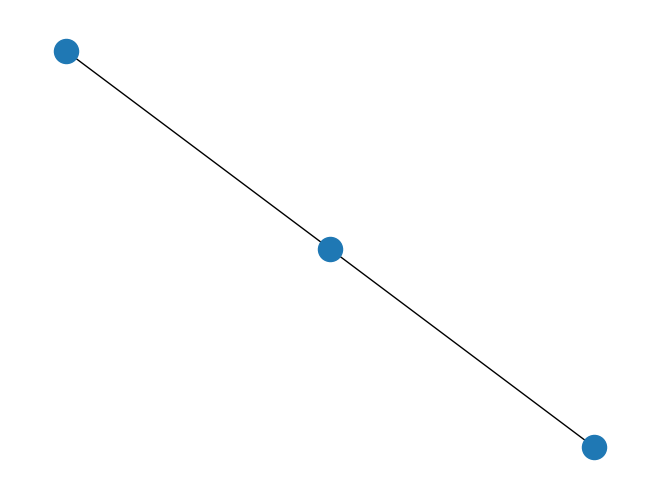

In [5]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

## Setup pyvis

In [6]:
from pyvis.network import Network

In [7]:
# pyvis part
from IPython.core.display import display, HTML


def draw_networkx(nx_graph, identity = 0, layout = 'atlas'):
    nt = Network("500px", "500px", notebook=True, cdn_resources='remote')
    nt.from_nx(nx_graph)
    nt.bgcolor = '#ffffff'
    nt.toggle_physics(True)
    nt.set_edge_smooth('straightCross')
    if layout == 'atlas':
      nt.force_atlas_2based()
    #else:
    #  nt.hrepulsion()
    nt.prep_notebook()
    filename = 'graph_{0}.html'.format(identity)
    nt.show(filename)
    display(HTML(filename = filename))

/tmp/ipykernel_25251/1366606316.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Read a graph from a file
[KONECT](http://konect.cc/networks/) (the Koblenz Network Collection) is a project that aims at collecting and sharing datasets representing graphs of large dimension.

Let's download a graph using wget.

In [36]:
# download
!wget http://konect.cc/files/download.tsv.ego-twitter.tar.bz2
# unzip
!tar -xf download.tsv.ego-twitter.tar.bz2

--2024-03-14 18:35:19--  http://konect.cc/files/download.tsv.ego-twitter.tar.bz2
Resolving konect.cc (konect.cc)... 138.48.20.248
Connecting to konect.cc (konect.cc)|138.48.20.248|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93894 (92K) [application/x-bzip2]
Saving to: ‘download.tsv.ego-twitter.tar.bz2.2’

download.tsv.ego-tw 100%[===================>]  91,69K  --.-KB/s    in 0,1s    

2024-03-14 18:35:19 (768 KB/s) - ‘download.tsv.ego-twitter.tar.bz2.2’ saved [93894/93894]



`read_edgelist` is used for reading graph data from a file.

In [9]:
import networkx as nx
G = nx.read_edgelist('ego-twitter/out.ego-twitter', comments='%', delimiter='\t')

How many nodes are there? (plotting >1000 nodes at once may take a while)

In [10]:
len(G.nodes())

23370

## Twitter dataset visualization
To get a quick idea of the structure of the Twitter graph, let's select a small subgraph.

In [11]:
G_small = G.subgraph([str(x) for x in range(1, 101)])

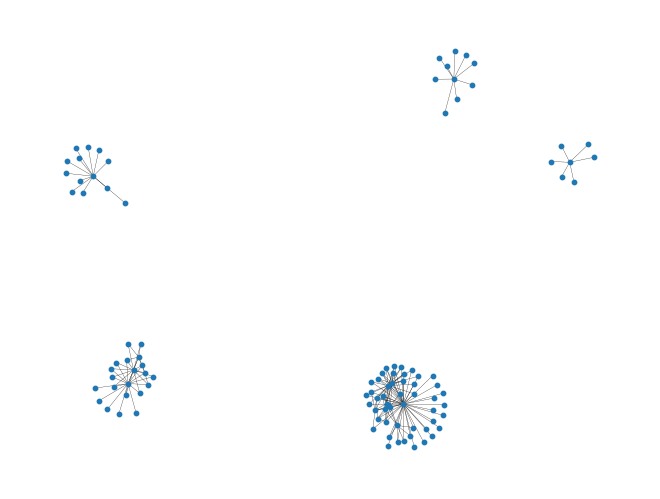

In [12]:
nx.draw(G_small, node_size=10, width=0.2)

In [13]:
draw_networkx(G_small, layout = '')

graph_0.html


## Stack Overflow visualization
How often the tags of Stack Overflow appear together vs. how often they appear separatedly 

All Stack Overflow user contributions are licensed under CC-BY-SA 3.0 with attribution required.


In [14]:
!wget https://github.com/BouncyButton/ai-material/raw/main/stack_network_links.csv
!wget https://github.com/BouncyButton/ai-material/raw/main/stack_network_nodes.csv

--2024-03-14 18:33:30--  https://github.com/BouncyButton/ai-material/raw/main/stack_network_links.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BouncyButton/ai-material/main/stack_network_links.csv [following]
--2024-03-14 18:33:30--  https://raw.githubusercontent.com/BouncyButton/ai-material/main/stack_network_links.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16490 (16K) [text/plain]
Saving to: ‘stack_network_links.csv.1’

stack_network_links 100%[===================>]  16,10K  --.-KB/s    in 0,008s  

2024-03-14 18:33:30 (1,87 MB/s) - ‘stack_network_links.csv.1’ saved [16490/1649

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

"""
SOURCE: https://www.kaggle.com/devisangeetha/network-visualizations-with-igraph/data
stack_network_links: contains links of the network, the source and target tech tags plus the value of the the link between each pair 
stack_network_nodes: contains nodes of the network, the name of each node, which group that node belongs to 
(calculated via a cluster walktrap), and a node size based on how often that technology tag is used
"""

'''
Create a new graph. Load nodes and arcs from files *.csv
'''
G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')
scale = 1/10

'''
Add nodes to the graph, setting for each node the cluster it belongs to and the node size
'''
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], size=row['nodesize']*scale)

'''
Add the weighted connections
'''    
for index, row in df_edges.iterrows():
    G.add_edges_from([(row['source'], row['target'], {'value':row['value'], 'width': row['value'] * scale})])

'''
Associate to each cluster a color taken from the colormap and to each node a dimension proportional to the node size
'''
# print nodes and edges
draw_networkx(G)


graph_0.html


## Application: literature analysis

Citation network of 12,412 papers citing 289 core papers on explanations (xAI)
* Nodes are papers
* Nodes are closer if more citing papers co-cite the same core papers
* Data driven approach to literature review
* Useful to understand how different research communities work and interact

Abdul, A., Vermeulen, J., Wang, D., Lim, B.Y., & Kankanhalli, M. (2018). [Trends and Trajectories for Explainable, Accountable and Intelligible Systems: An HCI Research Agenda.](https://dl.acm.org/doi/10.1145/3173574.3174156) Proceedings of the 2018 CHI Conference on Human Factors in Computing Systems.



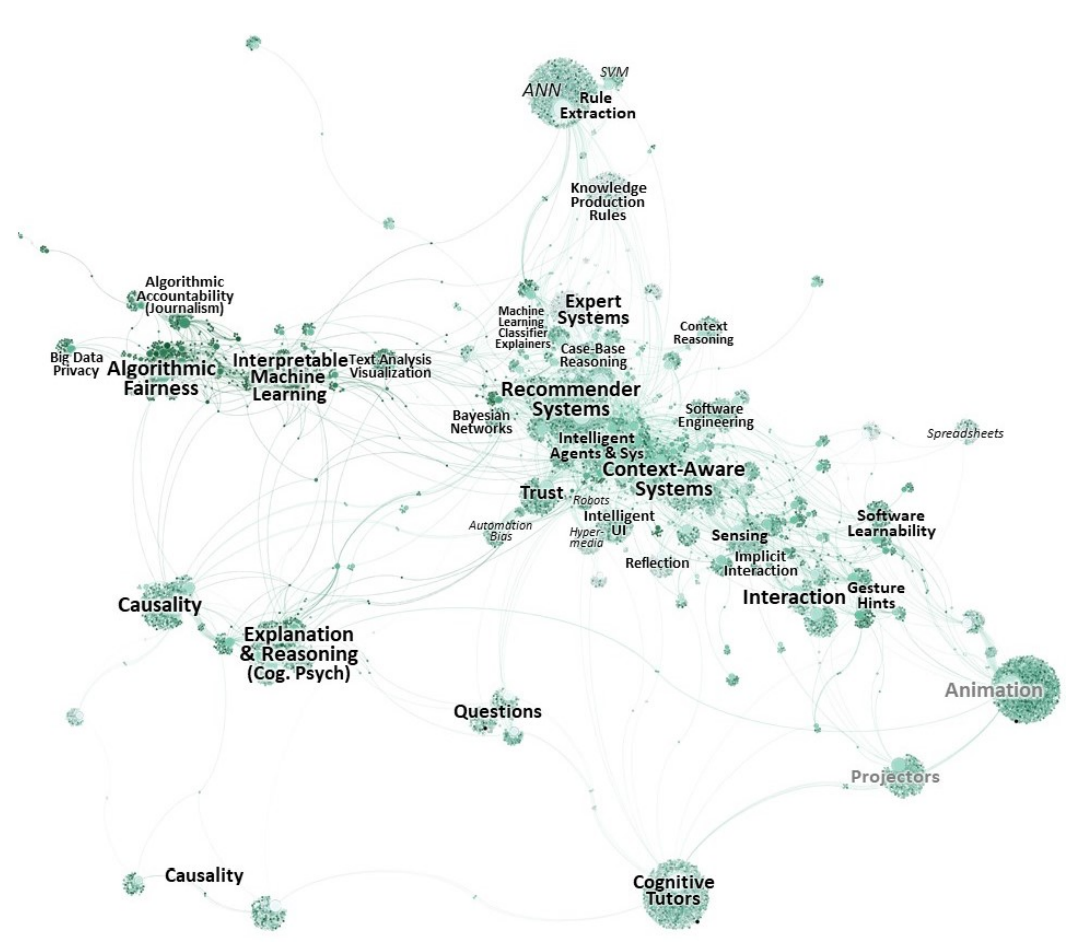

## Querying a graph
There are **many** methods available to extract useful features. Here we see only a small sample. 

In [16]:
G = nx.complete_graph(5)

In [17]:
draw_networkx(G)

graph_0.html


**Density**: the ratio between the number of arcs and the maximum possible number of arcs

In [18]:
nx.density(G)

1.0

**Diameter**: the longest minimum path



In [19]:
nx.diameter(G)

1

**Adjacency matrix**: matrix representation for a graph

In [20]:
nx.adjacency_matrix(G).todense()

/tmp/ipykernel_25251/2037155708.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G).todense()


matrix([[0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1],
        [1, 1, 1, 1, 0]])

**Degree** of a node

In [21]:
G.degree(0)

4

**Connected** nodes:

In [22]:
list(G.neighbors(0))

[1, 2, 3, 4]

Check if two nodes are connected:

In [23]:
nx.has_path(G,1,4)

True

# Exercises
Using NetworkX data structures, today we discuss:

* implementing the A* algorithm;
* implementing the Gale-Shapley algorithm.

## Romania cities

In [24]:
import networkx as nx
scale = 1/10

def romania():
	node_list = ["Bucharest","Giurgiu","Urziceni","Hirsova","Eforie","Neamt",
	             "Oradea","Zerind","Arad","Timisoara","Lugoj","Mehadia",
				 "Dobreta","Craiova","Sibiu","Fagaras","Pitesti",
				 "Rimnicu Vilcea","Vaslui","Iasi"]

	graph = nx.Graph()
	
	for i in node_list:
		graph.add_node(i, path=[], visited=False, g=0)
		
	graph.add_edge("Arad","Zerind", value=75, width = 75*scale)
	graph.add_edge("Arad","Timisoara", value=118, width = 118 * scale)
	graph.add_edge("Arad","Sibiu", value=140, width = 140 * scale)
	graph.add_edge("Zerind","Oradea", value=71, width = 71 * scale)
	graph.add_edge("Mehadia","Lugoj", value=70, width = 70 * scale)
	graph.add_edge("Mehadia","Dobreta", value=75, width = 75 * scale)
	graph.add_edge("Craiova","Dobreta", value=120, width = 120 * scale)
	graph.add_edge("Craiova","Rimnicu Vilcea", value=146, width = 146 * scale)
	graph.add_edge("Craiova","Pitesti", value=138, width = 138 * scale)
	graph.add_edge("Pitesti","Rimnicu Vilcea", value=97, width = 97 * scale)
	graph.add_edge("Pitesti","Bucharest", value=101, width = 101 * scale)
	graph.add_edge("Timisoara","Lugoj", value=111, width = 11 * scale)
	graph.add_edge("Sibiu","Fagaras", value=99, width = 99 * scale)
	graph.add_edge("Bucharest","Fagaras", value=211, width = 211 * scale)
	graph.add_edge("Bucharest","Giurgiu", value=90, width = 90 * scale)
	graph.add_edge("Bucharest","Urziceni", value=85, width = 85 * scale)
	graph.add_edge("Vaslui","Urziceni", value=142, width = 142 * scale)
	graph.add_edge("Vaslui","Iasi", value=92, width = 92 * scale)
	graph.add_edge("Neamt","Iasi", value=87, width = 87 * scale)
	graph.add_edge("Hirsova","Urziceni", value=98, width = 98 * scale)
	graph.add_edge("Hirsova","Eforie", value=86, width = 86 * scale)
	graph.add_edge("Sibiu","Rimnicu Vilcea", value=80, width = 80 * scale)
	graph.add_edge("Sibiu","Oradea", value=151, width = 151 * scale)

	return graph

In [25]:
draw_networkx(romania())

graph_0.html


In [26]:
import numpy as np
(nx.adjacency_matrix(romania())).todense()

/tmp/ipykernel_25251/4216892004.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  (nx.adjacency_matrix(romania())).todense()


matrix([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0,

## Useful attributes/methods

In [27]:
romania().nodes

NodeView(('Bucharest', 'Giurgiu', 'Urziceni', 'Hirsova', 'Eforie', 'Neamt', 'Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Dobreta', 'Craiova', 'Sibiu', 'Fagaras', 'Pitesti', 'Rimnicu Vilcea', 'Vaslui', 'Iasi'))

In [28]:
romania().nodes['Bucharest']

{'path': [], 'visited': False, 'g': 0}

In [29]:
romania().nodes['Bucharest']['visited']

False

In [30]:
list(romania().neighbors('Bucharest'))

['Pitesti', 'Fagaras', 'Giurgiu', 'Urziceni']

In [31]:
romania().get_edge_data('Bucharest', 'Pitesti')

{'value': 101, 'width': 10.100000000000001}

In [32]:
print(romania().nodes['Bucharest'])

{'path': [], 'visited': False, 'g': 0}


# Exercise 1
Implement an A* search algorithm in a function `astar(problem, start)`
that given a problem, defined by a networkx graph, and the name
of the starting node, finds the path to Bucharest and visualize the
length of the path found.

*Proposed* pseudocode:
```
A*(G, start, goal):
    f_start = h(start)
    frontier = [(start, f_start)]
    while frontier is not empty:
        current_node = frontier.pop()
        if current_node is goal:
            return solution
        for each neighbour of current_node:
            update g_scores adding w(current_node, neighbour) to the current g_scores
            
        add the neighbour nodes to the frontier if they are not in the frontier yet.

        for each node in frontier:
            if there is a better path (i.e. g(n) + h(n) < f(n)):
                update f_scores for node
    return None
                
        
    
```

The heuristic you will use to solve this exercise is the air distance from each city to Bucharest, defined in the cell below:

In [33]:
def air_distance():

	d = {}

	d["Bucharest"] = 0
	d["Giurgiu"] = 77
	d["Urziceni"] = 80
	d["Hirsova"] = 151
	d["Eforie"] = 161
	d["Neamt"] = 234
	d["Oradea"] = 380
	d["Zerind"] = 374
	d["Arad"] = 366
	d["Timisoara"] = 329
	d["Lugoj"] = 244
	d["Mehadia"] = 241
	d["Dobreta"] = 242
	d["Craiova"] = 160
	d["Sibiu"] = 253
	d["Fagaras"] = 176
	d["Pitesti"] = 100
	d["Rimnicu Vilcea"] = 193
	d["Vaslui"] = 199
	d["Iasi"] = 226
	
	return d

In [34]:
#@title assistant utilities { form-width: "10px" }
def prepare_assistant_network(graph, start, f_start):
  assistant_network = nx.Graph()
  assistant_network.add_nodes_from(graph)
  for n in assistant_network.nodes():
    assistant_network.nodes[n]['color'] = 'blue'
  for e in graph.edges():
    assistant_network.add_edge(e[0], e[1], color = 'gray')
  assistant_network.nodes[start]['label'] = start + '\n' +str(f_start)
  return assistant_network

def show_final_path(assistant_network, problem, current_node):
  assistant_network = reset_nodes(assistant_network)
  assistant_network = reset_edges(assistant_network)
  assistant_network = draw_path(assistant_network, problem, current_node, 'red')
  for node in problem.nodes[current_node]['path']+[current_node]:
    assistant_network.nodes[node]['color'] = 'red'
  return assistant_network

def reset_connection(assistant_network, problem, curr):
  assistant_network[problem.nodes[curr]['path'][-1]][curr]['color'] = 'gray'
  return assistant_network

def connect_neighbors(assistant_network, problem, current_node):
  for neighbor in problem.neighbors(current_node):
    assistant_network[current_node][neighbor]['color'] = 'blue'
  return assistant_network

def draw_path(assistant_network, problem, current_node, color):
  prev_node = None
  for node in problem.nodes[current_node]['path'] + [current_node]:
    if prev_node is not None:
      assistant_network[node][prev_node]['color'] = color
    prev_node = node
  return assistant_network

def reset_nodes(assistant_network):
  for node in assistant_network.nodes():
    assistant_network.nodes[node]['color'] = 'blue'
    assistant_network.nodes[node]['label'] = node
  return assistant_network

def reset_edges(assistant_network):
  for e in assistant_network.edges():
    assistant_network[e[0]][e[1]]['color'] = 'gray'
  return assistant_network

def draw_frontier(assistant_network, frontier, current_node, current_f):
  for node, f in frontier:
    assistant_network.nodes[node]['color'] = 'green'
    assistant_network.nodes[node]['label'] = node + '\n' +str(f)
  assistant_network.nodes[current_node]['color'] = 'red'
  assistant_network.nodes[current_node]['label'] = current_node + '\n' +str(current_f)
  return assistant_network

def prepare_for_drawing(assistant_network, problem, frontier, current_node, current_f):
    assistant_network = reset_nodes(assistant_network)
    assistant_network = reset_edges(assistant_network)
    assistant_network = connect_neighbors(assistant_network, problem, current_node)
    for node, _ in frontier:
      assistant_network = draw_path(assistant_network, problem, node, 'blue')
    assistant_network = draw_path(assistant_network, problem, current_node, 'red')
    assistant_network = draw_frontier(assistant_network, frontier, current_node, current_f)
    return assistant_network



In [38]:
from tables.link import Node
from networkx.algorithms.connectivity.disjoint_paths import node_disjoint_paths
import time 
from IPython.display import clear_output


def astar(problem, start):
  goal = 'Bucharest'
  h = air_distance()
  f_start = h[start]
  frontier = [(start, f_start)]
  i = 0

  ##
  assistant_network = prepare_assistant_network(problem, start, f_start)
  ##

  while not len(frontier) == 0:
    clear_output(wait = True)

    i = i + 1
    print('iteration {0}, fontier = {1}'.format(i, frontier))
    current_node, current_f = frontier.pop(0)

    if current_node == goal:
      ##
      assistant_network = show_final_path(assistant_network, problem, current_node)
      draw_networkx(assistant_network, identity = i)
      ##
      return problem.nodes[current_node]['path']+[goal]
    
    for neighbor in problem.neighbors(current_node):
      problem.nodes[neighbor]['g'] = problem.nodes[current_node]['g'] + problem.get_edge_data(current_node, neighbor)['value']

    for neighbor in problem.neighbors(current_node):
      current_f = problem.nodes[neighbor]['g'] + h[neighbor]
      if not neighbor in [x[0] for x in frontier]:
        frontier.append((neighbor,current_f))
        problem.nodes[neighbor]['path'] = problem.nodes[current_node]['path'] + [current_node]
      else:
        # neighbor is already in frontier: is the new g weight better than the previous one?
          for index, (name, previous_f) in enumerate(frontier):
            if name == neighbor:
              if current_f < previous_f:
                frontier[index] = (neighbor, current_f)
                problem.nodes[neighbor]['path'] = problem.nodes[current_node]['path'] + [current_node]

    
    frontier.sort(key=lambda x: x[1])
    ##
    assistant_network = prepare_for_drawing(assistant_network, problem, frontier, current_node, current_f)
    draw_networkx(assistant_network, identity = i)
    print()
    input()
    ##

  return None


ModuleNotFoundError: No module named 'tables'

In [ ]:
g = romania()

start = 'Arad'
print("Path found with A*: ")
solution = astar(g, start)
if solution is None:
	print("No path was found")
else:
	print(solution)
print("Total path length to reach Bucharest from " + start + ": " + str(g.nodes['Bucharest']['g']) + " km")

# Exercise 2
The following implementation `stable_marriage` is not completed. The code provided creates a bigraph composed by a set of students and a set of universities.
Each student provides a weighted preference over the universities he
would like to enroll, but only one student can enroll to each
university. Develop the Gale-Shapley algorithm to find a stable
matching.

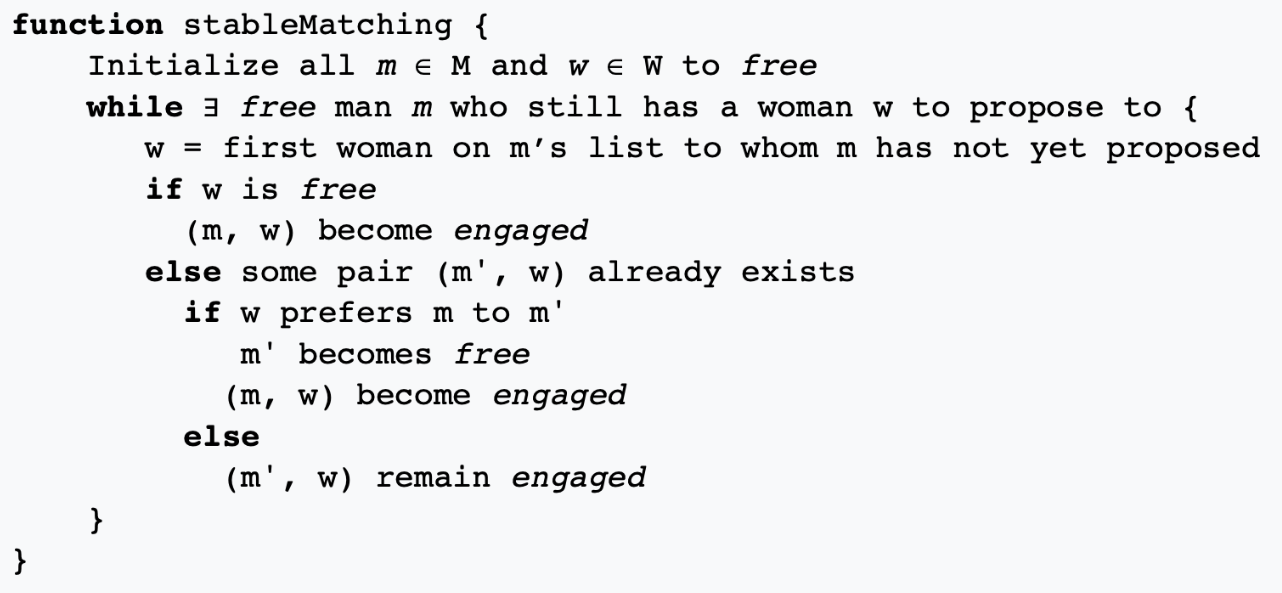

In [ ]:
def stable_marriage(g, M, W):
    data = g.nodes()
    for m in M:
        data[m]['free'] = True
    for w in W:
        data[w]['free'] = True
    
    m = True
    while m:
        # exists a free man m who has a woman w to propose to?
        m = next((m for w in W for m in M if data[m]['free'] and len(data[m]['proposed_to']) < len(W)), None)
        if not m:
            break

        ms_list = sorted(g[m].items(), key=lambda w: w[1]['weight'], reverse=True)
        # pick the first woman on m's list to whom m has not yet proposed
        w = next((w for w, w_data in ms_list if w not in data[m]['proposed_to']), None)

        data[m]['proposed_to'].append(w)
        print(m, 'proposed to', w)

        m1 = data[w]['engaged_to']
        # exists some pair (m', w)?
        if m1:
            # does w prefer m to m'?
            if g.get_edge_data(w, m)['weight'] > g.get_edge_data(w, m1)['weight']:
                print(w, 'prefers', m, 'instead of', m1)

                data[m1]['free'] = True
                data[w]['engaged_to'] = m
                data[m]['free'] = False
            else:
                print(w, 'does not prefer', m, 'and keeps', m1)


        else:
            # (m,w) become engaged
            print(w, 'chooses', m, "since she's free")

            data[w]['engaged_to'] = m
            data[m]['free'] = False


    solution = {}
    for w in W:
        solution[w] = data[w]['engaged_to']
    return solution

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def run_gs(wives_choices=None):
    graph = nx.DiGraph()

    men_list = ["Mario", "Luigi", "Carlo", "Paolo"]
    wives_list = ["UniPD", "UniTS", "UniMi", "UniVe"]

    color_map = {0: "#0000ff", 1: "#ff0000"}
    colors = []
    pos = {}

    for m in men_list:
        graph.add_node(m, gender=0, free=True, proposed_to=[]) 
        pos[m] = (men_list.index(m), 2) 

    for w in wives_list:
        graph.add_node(w, gender=1, free=True, engaged_to=[]) 
        pos[w] = (wives_list.index(w), 1) 
        
    colors = [color_map[graph.nodes[node]['gender']] for node in graph]

    for m in men_list:
        choices = [1,2,3,4]
        for w in wives_list:
            choice = random.choice(choices)
            choices.remove(choice)
            graph.add_edge(m, w, weight=choice)

    for w in wives_list:
        choices = list(wives_choices)
        for m in men_list:
            choice = random.choice(choices)
            choices.remove(choice)

            graph.add_edge(w, m, weight=choice)


    G2 = nx.Graph()
    M = stable_marriage(graph, men_list, wives_list)

    for w in wives_list:
        G2.add_edge(M[w], w)

    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw(graph, pos, node_color=colors, with_labels=True)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, label_pos=0.9, rotate=False)
    nx.draw_networkx_edges(G2, pos, alpha=0.4, edge_color='r', width=10)
    plt.show()




In [ ]:
run_gs(wives_choices=[1,2,3,4])

In [ ]:
run_gs(wives_choices=[0,0,0,0])